## Regression
+ training data의 오차를 최소화하는 모델을 찾는 방법
+ y = wx + b
+ 학습 : w와 b 를 찾는것
+ 방법 : MSE (Mean squared error)

### MSE 계산

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#0501 수식을 이용한 MSE계산
def MSE(y, t):
    return np.sum((y-t)**2)/t.size

t = np.array([1, 2, 3, 4])
y1 = np.array([0.5, 1, 1.5, 2])

print("MSE(t, y1)=", MSE(t, y1))

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2))

#MSE(t, y1)= 1.875
#MSE(t, y2)= 0.25
#y1.보다 y2가 더 t에 가까운 값

MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


In [10]:
#0502 reduce_mean을 사용한 MSE 계산
def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t))   # (y - t)**2

t = np.array([1, 2, 3, 4])

y1 = np.array([0.5, 1, 1.5, 2])
print("MSE(t, y1)=", MSE(t, y1).numpy())

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2).numpy())

MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


In [8]:
#0503 tf.keras.losses.MeanSquaredError를 사용한 MSE 계산
t = np.array([1, 2, 3, 4])

y1 = np.array([0.5, 1, 1.5, 2])
MSE = tf.keras.losses.MeanSquaredError()
print("MSE(t, y1)=", MSE(t, y1).numpy())

y2 = np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(t, y2)=", MSE(t, y2).numpy())

MSE(t, y1)= 1.875
MSE(t, y2)= 0.25


### 경사하강법

In [28]:
#0601 numpy를 이용한 경사하강법
def MSE(y, t):
    return np.sum((y-t)**2)/t.size

x = np.arange(12) # 입력데이터
t = np.arange(12) # 테스트데이터

w = 0.5     # 초기값 임의 설정
b = 0       # 초기값 임의 설정
lr = 0.001  # 학습률

loss_list = [ ]
for epoch in range(200):
    y = w*x + b                      # calculate the output
    dW = np.sum((y-t)*x)/(2*x.size)  # gradients
    dB = np.sum((y-t))/(2*x.size)

    w = w - lr*dW     # update parameters
    b = b - lr*dB

    y = w*x + b       # calculate the output
    loss = MSE(y, t)
    loss_list.append(loss)
##    if not epoch%10:
##        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={}".format(epoch, w, b, loss))

print("w={:>.4f}. b={:>.4f}, loss={:>.4f}".format(w, b, loss))

# lr = 0.01 => w=0.9936. b=0.0489, loss=0.0007
# lr = 0.001 => w=0.9853. b=0.0619, loss=0.0029
# lt = 0.01, 분자에 2가 갔을때 => w=0.9972. b=0.0212, loss=0.0001
# lr = 0.001, 분자에 2가 갔을때 => w=0.9924. b=0.0577, loss=0.0009

w=0.9853. b=0.0619, loss=0.0029


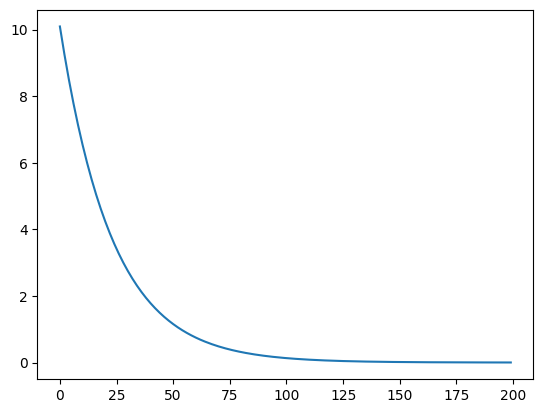

In [29]:
plt.plot(loss_list)
plt.show()

### 확률적 경사하강법

In [33]:
#0602
def MSE(y, t):
    return np.sum((y-t)**2)/t.size

x = np.arange(12)
t = np.arange(12)

w = 0.5
b = 0
lr = 0.001  # 0.01, learning rate
loss_list = [ ]

train_size = t.size # 12
batch_size = 4
K = train_size// batch_size # 3

for epoch in range(100):
    loss = 0
    for step in range(K): # K=3 (12//4)
        mask = np.random.choice(train_size, batch_size) # 샘플링대상 (12개에서 4개 뽑기)
        x_batch = x[mask]
        t_batch = t[mask]

        y = w*x_batch + b                               # calculate the output
        dW = np.sum((y-t_batch)*x_batch)/(2*batch_size) # gradients
        dB = np.sum((y-t_batch))/(2*batch_size)

        w = w - lr*dW   # update parameters
        b = b - lr*dB

        y = w*x_batch + b       # calculate the output
        loss += MSE(y, t_batch) # calculate MSE

    loss /= K  # average loss
    loss_list.append(loss)
    if not epoch%10:
        print("epoch={}: w={:>8.4f}. b={:>8.4f}, loss={}".format(epoch, w, b, loss))

print("w={:>8.4f}. b={:>8.4f}, loss={}".format(w, b, loss))

epoch=0: w=  0.5187. b=  0.0027, loss=5.922037777644628
epoch=10: w=  0.7298. b=  0.0307, loss=2.432347911107002
epoch=20: w=  0.8547. b=  0.0466, loss=0.722258613566107
epoch=30: w=  0.9231. b=  0.0549, loss=0.13755973455495696
epoch=40: w=  0.9561. b=  0.0590, loss=0.055050983593270535
epoch=50: w=  0.9741. b=  0.0611, loss=0.022527344907995336
epoch=60: w=  0.9819. b=  0.0619, loss=0.004971309827670759
epoch=70: w=  0.9871. b=  0.0623, loss=0.0020347521948107104
epoch=80: w=  0.9895. b=  0.0623, loss=0.001767971031683184
epoch=90: w=  0.9906. b=  0.0622, loss=0.0010943141682766904
w=  0.9909. b=  0.0620, loss=0.0020658835264169904


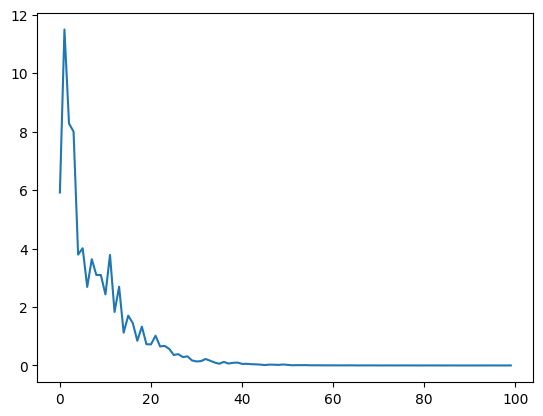

In [34]:
plt.plot(loss_list)
plt.show()

### 자동 미분 계산
+ tf.GradientTape 로 연산을 테이프에 기록하고
+ GradientTape.gradient()로 기록된 연산의 미분을 자동으로 계산

In [38]:
# 자동미분계산1 : tf.GradientTape()
x = tf.Variable(2.0) # tf.Variable(2.0, trainable=True)
y = tf.Variable(3.0) # tf.Variable(3.0, trainable=True)
# 주어진 입력변수 x,y에 대한 그래디언트를 계산
with tf.GradientTape() as tape:
    z = x**2 + y**2

dx, dy = tape.gradient(z, [x, y])

print('dx=', dx.numpy())
print('dy=', dy.numpy())

dx= 4.0
dy= 6.0


In [39]:
# 자동미분계산2 : tf.GradientTape(persistent=True)

x = tf.constant(2.0)
y = tf.constant(3.0)
#print(x)
# gradient tape는 "watched"로 설정된 변수만 추적할 수 있다
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    tape.watch(y)
    z = x**2 + y**2

dx, dy = tape.gradient(z, [x, y])

print('dx=', dx.numpy())
print('dy=', dy.numpy())

dx= 4.0
dy= 6.0


In [43]:
#0703 - "watched" 사용

x = tf.Variable(2.0) # tf.Variable(2.0, trainable=True) - "watched"로 설정된 텐서이다
y = tf.Variable(3.0) # tf.Variable(3.0, trainable=True)

# "watched"가 없으면 dx,dy는 none을 반환한다
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x)
    tape.watch(y)
    z = x**2 + y**2
dx, dy = tape.gradient(z, [x, y])

print('dx=', dx.numpy())
print('dy=', dy.numpy())

dx= 4.0
dy= 6.0


In [44]:
#0704 - 2차 미분

x = tf.Variable(3.0)

with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x**3
    dy = tape1.gradient(y, x) # dy = 3x**2
dy2 = tape2.gradient(dy, x) # dy2 = 6x

print('dy=', dy.numpy())
print('dy2=', dy2.numpy())

dy= 27.0
dy2= 18.0


### 텐서플로 단순 선형 회귀

In [48]:
# step 08 - 텐서플로 단순 선형 회귀
#0801 - 자동 미분 계산 2 : y = xw + b의 가중치 w, b를 손실함수를 사용한 경사하강법으로 구현

x = np.arange(12)   #x = tf.convert_to_tensor(x, dtype=tf.float32)
t = np.arange(12)   #t = tf.convert_to_tensor(t, dtype=tf.float32)

w = tf.Variable(0.5)    #임의값
b = tf.Variable(0.0)    #임의값
lr = 0.001   # 학습률

loss_list = [ ]  # for graph
for epoch in range(100):
    with tf.GradientTape() as tape:# y, loss를 tape에 기록
        y = x*w + b # 단순 선형 회귀 모델
        loss = tf.reduce_mean(tf.square(y - t))

    loss_list.append(loss.numpy())

    dW, dB = tape.gradient(loss, [w, b])
    w.assign_sub(lr * dW) # w = w + x * lr * error 갱신
    b.assign_sub(lr * dB)

    if not epoch%10:
        print("epoch={}: w={:>.4f}. b={:>.4f}, loss={}".format(
            epoch, w.numpy(), b.numpy(), loss.numpy()))

print("w={:>.4f}. b={:>.4f}, loss={}".format(w.numpy(), b.numpy(), loss.numpy()))

epoch=0: w=0.5422. b=0.0055, loss=10.541666984558105
epoch=10: w=0.8083. b=0.0401, loss=1.7546306848526
epoch=20: w=0.9169. b=0.0540, loss=0.29284951090812683
epoch=30: w=0.9612. b=0.0594, loss=0.049664050340652466
epoch=40: w=0.9793. b=0.0615, loss=0.009198411367833614
epoch=50: w=0.9867. b=0.0621, loss=0.0024564294144511223
epoch=60: w=0.9897. b=0.0621, loss=0.0013246409362182021
epoch=70: w=0.9910. b=0.0619, loss=0.0011262428015470505
epoch=80: w=0.9916. b=0.0617, loss=0.001083222683519125
epoch=90: w=0.9918. b=0.0613, loss=0.001066161785274744
w=0.9919. b=0.0610, loss=0.0010547313140705228


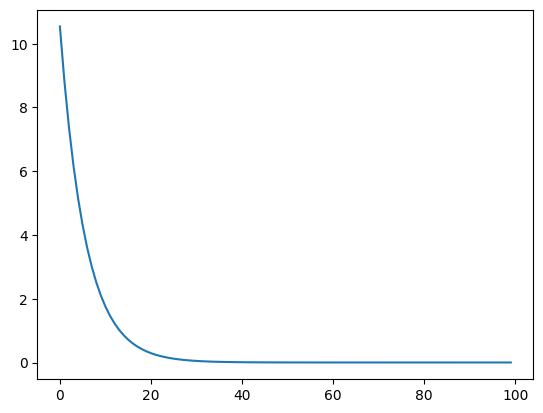

In [47]:
plt.plot(loss_list)
plt.show()

### 미니배치에 의한 확률적 경사하강법
+ 확률적 경사하강법, 미니배치 경사하강법 구글링으로 공부하기
+ 구글링: <a href='https://yhyun225.tistory.com/7'>모델이 학습하는 방법 - 확률적 경사하강법(Stochastic Gradient Descent, SGD)와 미니배치 경사하강법(mini-batch Gradient Descent)</a>
+ 구글링: <a href='https://skyil.tistory.com/68'>배치와 미니 배치, 확률적 경사하강법</a>

In [53]:
#0802 - 미니배치에 의한 확률적 경사하강법

x = np.arange(12)
t = np.arange(12)

w = tf.Variable(0.5)
b = tf.Variable(0.0)
lr= 0.001   # learning rate, 0.0001

train_size = x.size # 12
batch_size = 4 # mini-batch
K = train_size// batch_size

loss_list = [ ]
for epoch in range(100):
    batch_loss = 0.0
    for step in range(K): # 4번 돈다
        mask = np.random.choice(train_size, batch_size) # t의 샘플링 (12개 중에 4개)
        x_batch = x[mask] # stochastic
        t_batch = t[mask]

        with tf.GradientTape() as tape:
            y = w*x_batch + b
            loss = tf.reduce_mean(tf.square(y - t_batch))

        dW, dB = tape.gradient(loss, [w, b])
        w.assign_sub(lr * dW)
        b.assign_sub(lr * dB)

        batch_loss += loss.numpy() # pre-update loss
    batch_loss /= K #  average loss
    loss_list.append(batch_loss)

    if not epoch%10:
        print("epoch={}: w={:>.4f}. b={:>.4f}, batch_loss={}".format(
                epoch, w.numpy(), b.numpy(), batch_loss))

print("w={:>.4f}. b={:>.4f}, batch_loss={}".format(w.numpy(), b.numpy(), batch_loss))

epoch=0: w=0.6242. b=0.0158, batch_loss=9.597347577412924
epoch=10: w=0.9709. b=0.0587, batch_loss=0.017959410324692726
epoch=20: w=0.9901. b=0.0603, batch_loss=0.0008330010459758341
epoch=30: w=0.9926. b=0.0594, batch_loss=0.0008312852975601951
epoch=40: w=0.9922. b=0.0584, batch_loss=0.0010941329722603161
epoch=50: w=0.9927. b=0.0574, batch_loss=0.0007285699830390513
epoch=60: w=0.9927. b=0.0566, batch_loss=0.0005316767007267723
epoch=70: w=0.9926. b=0.0557, batch_loss=0.0004201761039439589
epoch=80: w=0.9928. b=0.0548, batch_loss=0.0006404278489450613
epoch=90: w=0.9931. b=0.0539, batch_loss=0.0006931432581041008
w=0.9930. b=0.0531, batch_loss=0.00047746390919201076


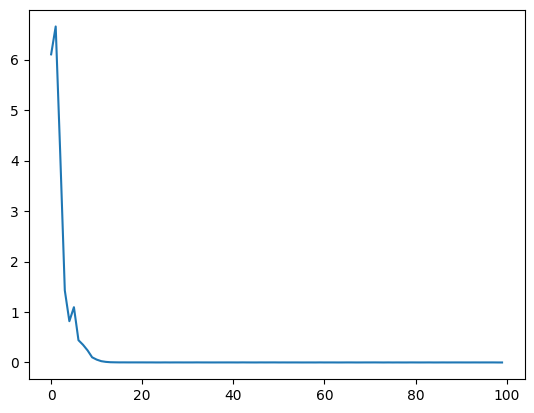

In [51]:
plt.plot(loss_list)
plt.show()

### 다변수 선형회귀
+ x1, x2, t

In [55]:
#0901 - step09 - 다변수 선형 회귀 > 2변수 선형 모델 MSE

#학습 전
##def MSE(y, t):
##    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2
MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1] # 슬라이싱
t = train_data[:, -1:]  # 슬라이싱
#X = tf.convert_to_tensor(X, dtype=tf.float32)
#t = tf.convert_to_tensor(t, dtype=tf.float32)
# print("X=", X)
# print("t=", t)

tf.random.set_seed(1) # 난수열 초기화
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
##W = tf.Variable([[0.5],[0.5]], dtype=tf.float32)
##b = tf.Variable(0.0)
print("W=", W.numpy()) # w[0] = 1, w[2] = 2
print("b=", b.numpy()) # b = 3 << t = 1 * x1 + 2 * x2 + 3 이므로

y = tf.matmul(X, W) + b #  y = x * w + b
print("y=", y.numpy())

loss = MSE(y, t)
print("MSE(y, t)=", loss.numpy())


W= [[-1.1012203]
 [ 1.5457517]]
b= [0.40308788]
y= [[-0.6981324 ]
 [-1.7993526 ]
 [-2.900573  ]
 [-4.001793  ]
 [ 0.8476193 ]
 [-0.25360093]
 [-1.3548213 ]
 [-2.4560416 ]]
MSE(y, t)= 70.80983


In [56]:
#0902 - 2변수 선형 회귀
# 목표값에 대하여 경사하강법으로 훈련 데이터 학습 목표 값과 비교
MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1) # 난수열 초기화
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
lr = 0.01  # learning rate, 0.001

loss_list = [ ]
for epoch in range(2000):
    with tf.GradientTape() as tape:
        y = tf.matmul(X, W) + b
        loss = MSE(y, t)
    loss_list.append(loss.numpy())

    dW, dB = tape.gradient(loss, [W, b])
    W.assign_sub(lr * dW)
    b.assign_sub(lr * dB)

##    if not epoch%100:
##        print("epoch={}: loss={}".format(epoch, loss.numpy()))

print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(), loss.numpy()))

W=[[1.0032761]
 [2.005639 ]]. b=[2.9875078], loss=2.3675645934417844e-05


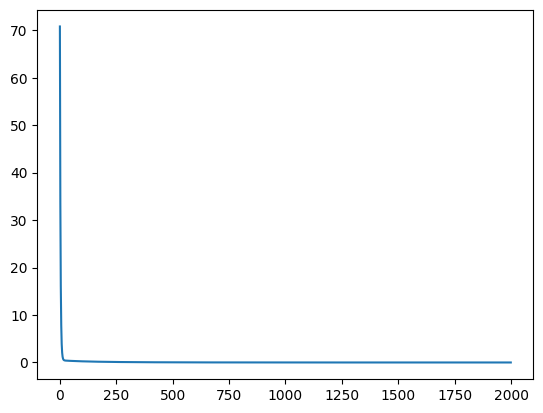

In [57]:
plt.plot(loss_list)
plt.show()

In [58]:
#0903 - 2변수 선형 회귀의 미니배치 학습

MSE = tf.keras.losses.MeanSquaredError()

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))
lr = 0.01   # learning rate, 0.001

train_size = X.shape[0]
batch_size = 4
K = train_size// batch_size

loss_list = [ ]
for epoch in range(1000):
    batch_loss = 0.0
    for step in range(K):
      # 미니배치로 확률적 경사 하강법 구현 - 랜덤 샘플링
        mask = np.random.choice(train_size, batch_size)
        x_batch = X[mask] # 미니 배치 데이터를 추출하여 계산
        t_batch = t[mask]

        with tf.GradientTape() as tape:
            y = tf.matmul(x_batch, W) + b
            loss = MSE(y, t_batch)

        batch_loss += loss.numpy()

        dW, dB = tape.gradient(loss, [W, b])
        W.assign_sub(lr * dW)
        b.assign_sub(lr * dB)

    batch_loss /= K
    loss_list.append(batch_loss) # average loss
##    if not epoch%100:
##            print("epoch={}, batch_loss={}".format(epoch, batch_loss))

print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(), batch_loss))

W=[[1.0030948]
 [2.0049906]]. b=[2.9883814], loss=7.600438266308629e-06


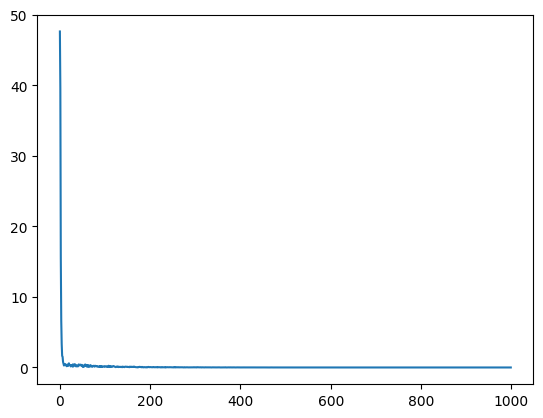

In [59]:
plt.plot(loss_list)
plt.show()

### tf.keras.optimizers
+ default learning rate = 0.001
+ 대부분 손실함수 최적화 문제에서 Adam(), RMSprop() 등을 사용

In [60]:
#1001 - tf.keras.optimizers를 이용한 학습 > 함수 최적화
# loss = x**2 + y ** 2의 최소해를 구하는 문제이다

x = tf.Variable(2.0)
y = tf.Variable(3.0)

opt = tf.keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.001
##opt = tf.keras.optimizers.Adagrad(0.1)
##opt = tf.keras.optimizers.Adam(0.1)
##opt = tf.keras.optimizers.RMSprop(0.1)

loss_list = [ ]
for epoch in range(100):
        with tf.GradientTape() as tape:
                loss = x**2 + y**2
        loss_list.append(loss.numpy())

##        grads = tape.gradient(loss, [x, y])
##        grads_list = [g for g in grads]
##        grads_and_vars = zip(grads_list, [x, y])

        dx, dy = tape.gradient(loss, [x, y])
        grads_and_vars = zip([dx, dy], [x, y]) # 순서쌍을 묶는다
        opt.apply_gradients(grads_and_vars) # 최적화 수행

##        if not epoch%10:
##                print("epoch={}: loss={}".format(epoch, loss.numpy()))

print ("x={:.5f}, y={:.5f}, loss={}".format(
        x.numpy(), y.numpy(), loss.numpy()))

x=0.00000, y=0.00000, loss=8.428705744119335e-19


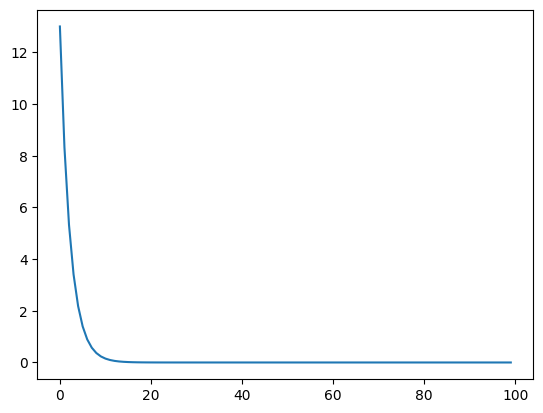

In [61]:
plt.plot(loss_list)
plt.show()

In [64]:
#1002 - 함수 최적화 2

x = tf.Variable(2.0)
y = tf.Variable(3.0)

opt = tf.keras.optimizers.SGD(learning_rate=0.1) # learning_rate=0.001
##opt = tf.keras.optimizers.Adagrad(0.1)
##opt = tf.keras.optimizers.Adam(0.1)
##opt = tf.keras.optimizers.RMSprop(0.1)

loss_list = [ ]
for epoch in range(100):
        # 람다식은 매개변수 없는 수식
        loss = lambda : x**2+ y**2   # function
        loss_list.append(loss().numpy())
        # 함수 loss에서 변수 리스트 [x,y] 최적화
        opt.minimize(loss, var_list=[x, y])

        # if not epoch%10:
        #         print("epoch={}: loss={}".format(epoch, loss().numpy()))

print ("x={:.5f}, y={:.5f}, loss={}".format(
        x.numpy(), y.numpy(), loss().numpy()))

x=0.00000, y=0.00000, loss=5.394372027788135e-19


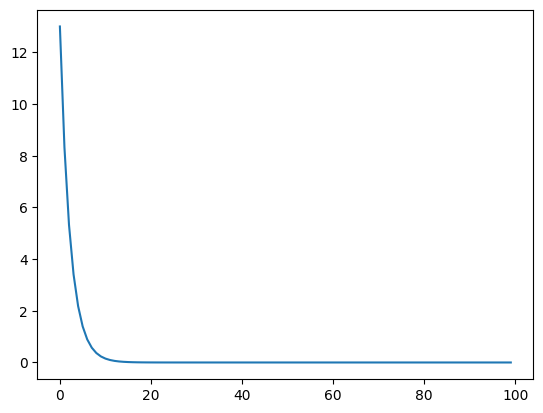

In [63]:
plt.plot(loss_list)
plt.show()

In [71]:
#1003 - 2변수 선형 회귀 : MSE에 의한 경사 하강법

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
    y = tf.matmul(X, W) + b
    return MSE(y, t)
##    return tf.reduce_mean(tf.square(y - t))

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01) # W=[[1.0356467] [2.059366 ]], b=[2.8650992], loss=0.0027286838740110397
#opt = tf.keras.optimizers.Adagrad(0.01) # W=[[-0.51919657] [ 2.1235433 ]], b=[0.9849223], loss=35.9661865234375
#opt = tf.keras.optimizers.Adam(0.01) # W=[[1.0618159] [2.4080844]], b=[2.593033], loss=0.04875081777572632
opt = tf.keras.optimizers.RMSprop(0.01) # W=[[0.995] [1.9950006]], b=[2.9950001], loss=0.00043748487951233983

loss_list = [ ]
for epoch in range(1000):
    opt.minimize(mse_loss, var_list= [W, b])

    loss = mse_loss().numpy()
    loss_list.append(loss)
##    if not epoch % 100:
##            print ("epoch={}: loss={:.5f}".format(epoch, loss))

print ("W={}, b={}, loss={}".format(
        W.numpy(), b.numpy(), loss))

W=[[0.995    ]
 [1.9950006]], b=[2.9950001], loss=0.00043748487951233983


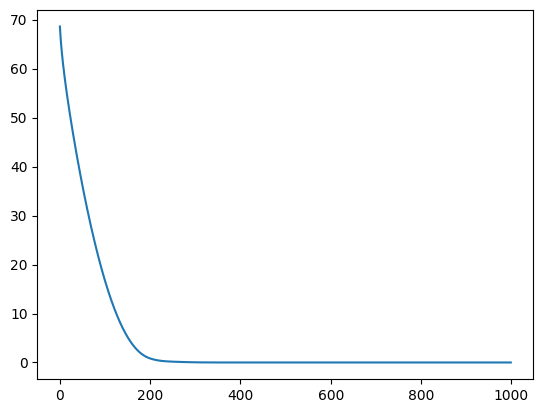

In [66]:
plt.plot(loss_list)
plt.show()

In [72]:
#1004

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
    y = tf.matmul(x_batch, W) + b
    return MSE(y, t_batch)
##    return tf.reduce_mean(tf.square(y - t_batch))

train_data = np.array([ # t = 1*x1 + 2*x2 + 3
#  x1, x2, t
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X = train_data[:, :-1]
t = train_data[:, -1:]

tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2, 1]), )
b = tf.Variable(tf.random.normal(shape=[1]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adagrad(0.01)
##opt = tf.keras.optimizers.Adam(0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

train_size = X.shape[0]
batch_size = 4
K = train_size// batch_size

loss_list = [ ]
for epoch in range(1000):
    batch_loss = 0.0
    for  step  in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = X[mask]
        t_batch = t[mask]

        opt.minimize(mse_loss, var_list= [W, b])
        loss = mse_loss().numpy()
        batch_loss += loss

    batch_loss /= K # average loss
    loss_list.append(batch_loss)
##    if not epoch % 100:
##            print ("epoch={}: batch_loss={:.5f}".format(epoch, batch_loss))

print ("W={}, b={}, loss={}".format(
        W.numpy(), b.numpy(), batch_loss))

W=[[1.0031085]
 [2.0058105]], b=[2.987382], loss=3.1403714274347294e-05


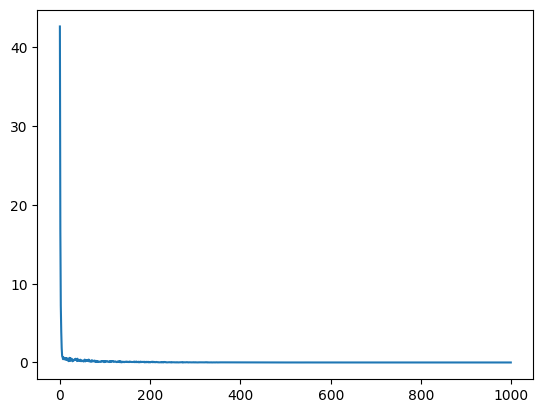

In [73]:
plt.plot(loss_list)
plt.show()

### 다항식 회귀

In [75]:
#1101 - 다항식 회귀  n= 1인 다항식: y = wx + b

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = x*w + b # y = 3x - 10
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = tf.linspace(0.0, 10.0, num=train_size) #np.linspace(0.0, 10.0, num=20)
w_true, b_true = 3, -10  # truth, line parameters
t = x*w_true + b_true + tf.random.normal([train_size], mean=0.0, stddev=2.0)
print(x)
print(t)
# train parameters
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_list = [ ]
for epoch in range(EPOCH):
    opt.minimize(mse_loss, var_list= [w, b]) # 손실함수 mse_loss에서 [w,b]로 최적화한다

    loss = mse_loss().numpy()
    loss_list.append(loss)
    # if not epoch%100:
    #     print("epoch={}: loss={}".format(epoch, loss))

print("w={:>.4f}. b={:>.4f}, loss={}".format(w.numpy(), b.numpy(), loss))

tf.Tensor(
[ 0.         0.5263158  1.0526316  1.5789474  2.1052632  2.631579
  3.1578948  3.6842108  4.2105265  4.736842   5.263158   5.789474
  6.3157897  6.8421054  7.3684216  7.8947372  8.421053   8.947369
  9.473684  10.       ], shape=(20,), dtype=float32)
tf.Tensor(
[-12.20244     -5.32955     -6.0748167   -7.0224733   -6.1335545
  -4.0675054   -0.35070002   0.6461116    1.515267     2.7694383
   4.537489     5.9383698    8.25066      9.853376    12.470416
  15.901402    17.822475    16.799154    17.781675    20.74665   ], shape=(20,), dtype=float32)
w=3.1359. b=-10.9725, loss=2.1445038318634033


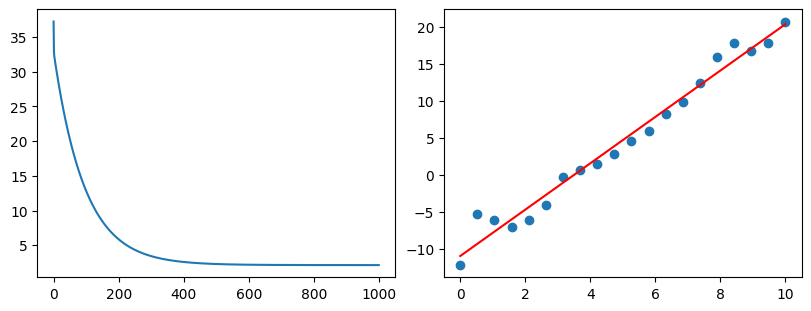

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')
axs[0].plot(loss_list)

axs[1].scatter(x, t.numpy())  # train data plot
w_pred, b_pred = w.numpy(), b.numpy() # predicted, line parameters
t_pred= x*w_pred + b_pred
axs[1].plot(x, t_pred, 'r-')
plt.show()

In [78]:
#1102 - n= 2 : 2차 함수 회귀

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = a*x**2 + b*x+c
##     y = a*tf.pow(x, 2) + b**x + c
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = tf.linspace(-5.0, 5.0, num=train_size)
# 다항식 y = 3x**2 + 2x + 1에 대하여 학습
a_true = tf.Variable(3.0)
b_true = tf.Variable(2.0)
c_true = tf.Variable(1.0)
t = a_true*tf.pow(x, 2) + b_true*x+c_true
t += tf.random.normal([train_size], mean=0.0, stddev = 2) # t 함수에 정규 분포 노이즈를 추가
#t = tf.add(t, np.random.normal(0, 2.0, train_size))

a = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))
c = tf.Variable(tf.random.normal([]))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

loss_list = [ ]
for epoch in range(EPOCH):
    opt.minimize(mse_loss, var_list= [a, b, c]) # 최적화

    loss = mse_loss().numpy()
    loss_list.append(loss)

    # if not epoch%100:
    #     print("epoch={}: loss={}".format(epoch, loss))

print("a={:>.4f}. b={:>.4f}, c={:>.4f}, loss={}".format(
       a.numpy(), b.numpy(), c.numpy(),loss))

a=3.0130. b=2.1439, c=0.8757, loss=2.1510555744171143


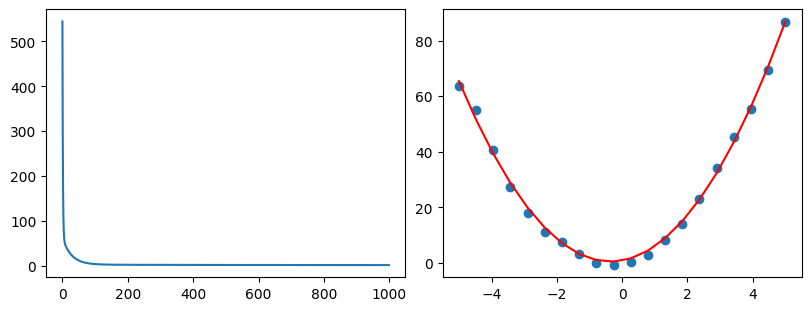

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')
axs[0].plot(loss_list)

axs[1].scatter(x, t.numpy())  # train data plot
t_pred = a*tf.pow(x, 2) + b*x + c # parabola curve
axs[1].plot(x, t_pred, 'r-')
plt.show()

In [80]:
#1103 - n차 다항식

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = tf.zeros_like(x)
     for i in range(W.shape[0]):
          y += W[i]*(x**(i+1)) # y = 3x**3 +2x**2+x+4
     y += b # bias
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 5000
train_size = 20

# create the train data
tf.random.set_seed(1)
x = tf.linspace(-5.0, 5.0, num=train_size)

w_true = tf.Variable([1.0, 2.0, 3.0])
b_true = tf.Variable(4.0)
t = w_true[2]*x**3 + w_true[1]*x**2 + w_true[0]*x + b_true
t += tf.random.normal([train_size], mean=0.0, stddev = 30)

# train variables -  훈련 변수 생성
n = 4 # n-th polynomial curve
W = tf.Variable(tf.random.normal([n]))
b = tf.Variable(tf.random.normal([]))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

loss_list = [ ]
for epoch in range(EPOCH):
    opt.minimize(mse_loss, var_list= [W, b])

    loss = mse_loss().numpy()
    loss_list.append(loss)

    # if not epoch%100:
    #     print("epoch={}: loss={}".format(epoch, loss))

print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(),loss))

W=[ 6.217233   3.2541513  2.8085194 -0.0326881]. b=-5.52933931350708, loss=401.86627197265625


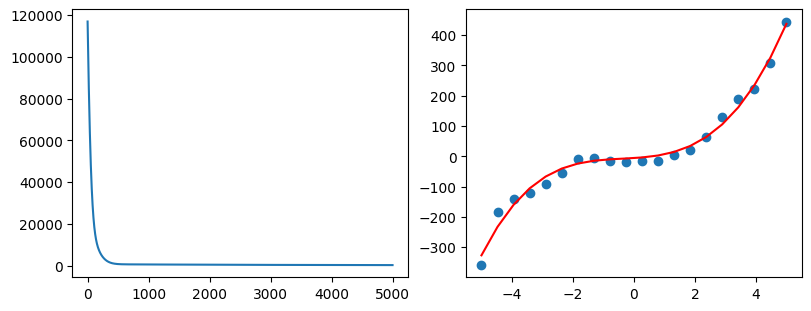

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), layout='constrained')
axs[0].plot(loss_list)

axs[1].scatter(x, t.numpy())  # train data plot

# polynomial curve
t_pred = tf.zeros_like(x)
for i in range(W.shape[0]): # n = W.shape[0]
     t_pred += W[i]*(x**(i+1))
t_pred += b # bias

axs[1].plot(x, t_pred, 'r-')
plt.show()